# EDA for Consumer Behaviour Analysis of Ecommerce

# Importing Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading File

In [15]:
df = pd.read_csv(r"E:\E commerce project\Cleaned_Ecommerce_Data _working.csv")

# Checking Structure

In [16]:
df.columns  #checking names to columns

Index(['Customer_Id', 'Age', 'Gender', 'Income_Level', 'Marital_Status',
       'Education_Level', 'Occupation', 'Location', 'Purchase_Category',
       'Purchase_Amount', 'Frequency_Of_Purchase', 'Purchase_Channel',
       'Brand_Loyalty', 'Product_Rating',
       'Time_Spent_On_Product_Research(Hours)', 'Social_Media_Influence',
       'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
       'Engagement_With_Ads', 'Device_Used_For_Shopping', 'Payment_Method',
       'Time_Of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member',
       'Purchase_Intent', 'Shipping_Preference', 'Time_To_Decision',
       'Purchase_Day', 'Is_Weekend'],
      dtype='object')

In [18]:
df.dtypes  # checking data type of columns

Customer_Id                               object
Age                                        int64
Gender                                    object
Income_Level                              object
Marital_Status                            object
Education_Level                           object
Occupation                                object
Location                                  object
Purchase_Category                         object
Purchase_Amount                          float64
Frequency_Of_Purchase                      int64
Purchase_Channel                          object
Brand_Loyalty                              int64
Product_Rating                           float64
Time_Spent_On_Product_Research(Hours)    float64
Social_Media_Influence                    object
Discount_Sensitivity                      object
Return_Rate                                int64
Customer_Satisfaction                      int64
Engagement_With_Ads                       object
Device_Used_For_Shop

# --- Basic Overview

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_Id                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   float64
 10  Frequency_Of_Purchase                  1000 non-null   int64  
 11  Purch

In [15]:
print(df.describe())

               Age  Purchase_Amount  Frequency_Of_Purchase  Brand_Loyalty  \
count  1000.000000      1000.000000            1000.000000    1000.000000   
mean     34.304000       275.063880               6.945000       3.026000   
std       9.353238       131.532998               3.147361       1.416803   
min      18.000000        50.710000               2.000000       1.000000   
25%      26.000000       162.235000               4.000000       2.000000   
50%      34.500000       276.165000               7.000000       3.000000   
75%      42.000000       388.982500              10.000000       4.000000   
max      50.000000       498.330000              12.000000       5.000000   

       Product_Rating  Time_Spent_On_Product_Research(Hours)  Return_Rate  \
count     1000.000000                            1000.000000  1000.000000   
mean         3.033000                               1.013030     0.954000   
std          1.436654                               0.791802     0.810272  

# Checking total number of null values

In [17]:
print(df.isnull().sum())

Customer_Id                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_Of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_On_Product_Research(Hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_With_Ads                      0
Device_Used_For_Shopping                 0
Payment_Method                           0
Time_Of_Purchase                         0
Discount_Us

# --- KPI Calculations

In [2]:
# calculating total revenue

In [22]:

total_revenue = df['Purchase_Amount'].sum()
print(f"Total Revenue: ₹{total_revenue:.2f}")

Total Revenue: ₹275063.88


In [4]:
# Calculating average purchase value per order

In [24]:

avg_purchase = df['Purchase_Amount'].mean()
print(f"Average Purchase Amount: ₹{avg_purchase:.2f}")

Average Purchase Amount: ₹275.06


In [6]:
# Calculating repeat customer rate  

In [29]:

repeat_customer_rate = df['Frequency_Of_Purchase'].gt(1).mean()
print(f"Repeat Customer Rate: {repeat_customer_rate:.2%}")

Repeat Customer Rate: 100.00%


In [8]:
# Calculating average satisfaction of customer

In [31]:

avg_satisfaction = df['Customer_Satisfaction'].mean()
print(f"Average Customer Satisfaction: {avg_satisfaction:.2f}/10")


Average Customer Satisfaction: 5.40/10


# Checking various customer segments 

In [10]:
# like Age, Gender, Income_Level, Education_Level, Location, Purchase_Amount, Brand_Loyalty, Customer_Loyalty_Program_Member

In [12]:
# Location - wise Purchase Behavior 

C:\Users\HP\AppData\Local\Temp\ipykernel_29244\3606445163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


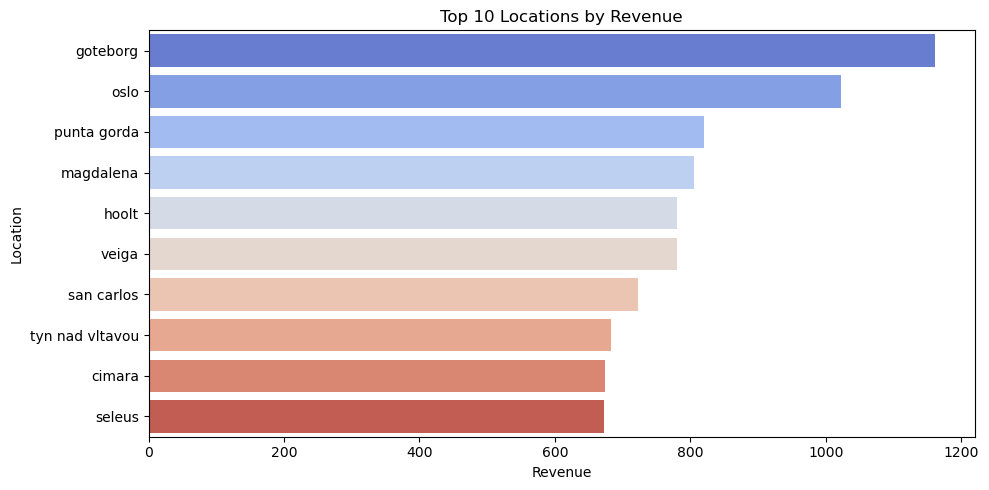

In [21]:
# Top Locations by Revenue 
top_locations = df.groupby('Location')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

In [14]:
# Goteborg have highest revenue.

In [16]:
# Income - wise Purchase Behavior

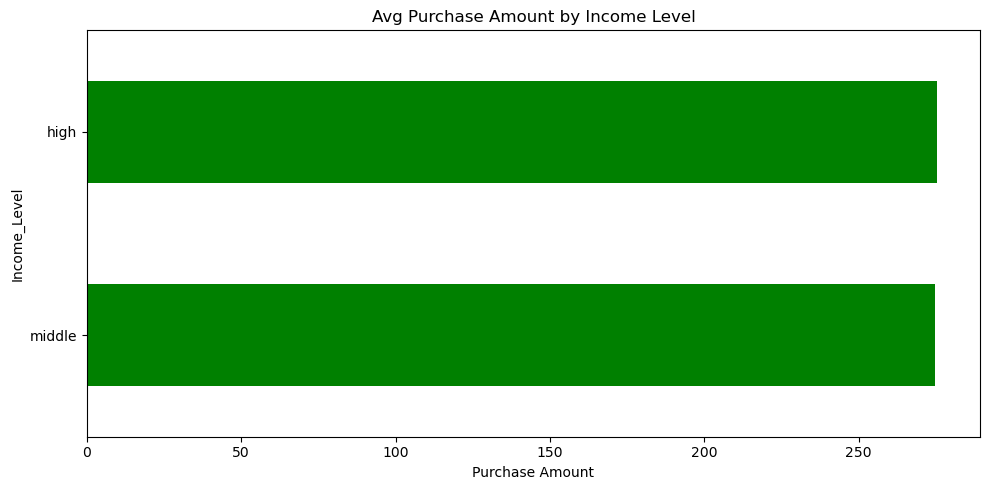

In [21]:
# Do people with different income levels spend differently?


income_purchase = df.groupby('Income_Level')['Purchase_Amount'].mean().sort_values()

plt.figure(figsize=(10,5))

income_purchase.plot(kind='barh', color='green')

plt.title('Avg Purchase Amount by Income Level')
plt.xlabel('Purchase Amount')
plt.tight_layout()
plt.show()

In [18]:
# High-income and middle-income customers are spending almost equally.
# This suggests income level might not be a strong differentiator for average spend across income levels.

In [20]:
# Gender - wise Purchase Behavior 

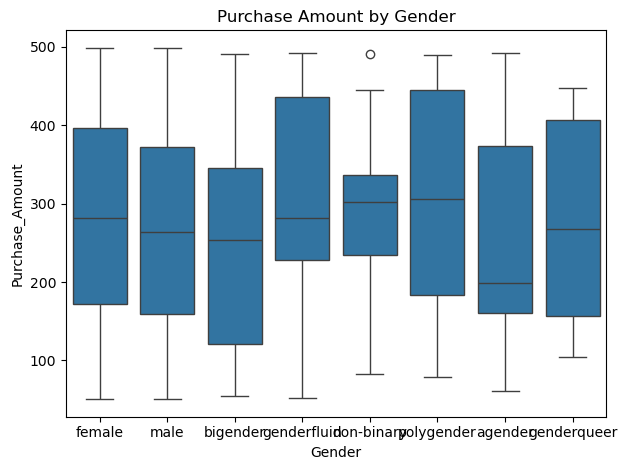

In [25]:
#  Do male and female customers show differences in how much they spend?

sns.boxplot(x='Gender', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Gender')
plt.tight_layout()
plt.show()

In [22]:
# Polygender and fluid customers seem to have higher median and upper quartile spending as compared to others.
# Agender and bigender show lower spending on average.
# Female and male have slightly lower medians than some non-binary categories.


In [24]:
# Loyality-wise Purchase Behavior 

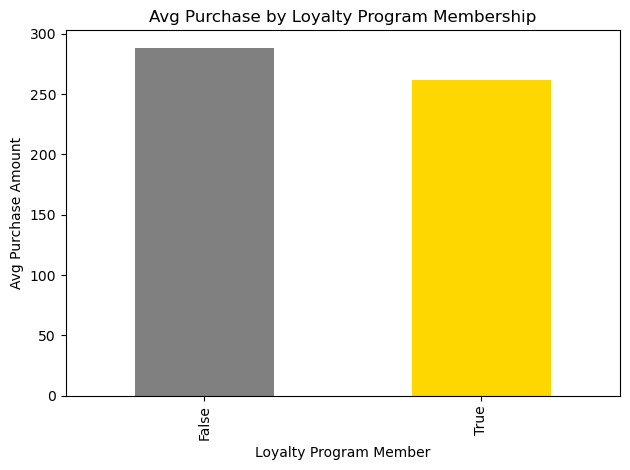

In [27]:
# Does being part of the loyalty program influence how much customers spend?

loyalty_kpi = df.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()

loyalty_kpi.plot(kind='bar', title='Avg Purchase by Loyalty Program Membership', color=['gray', 'gold'])

plt.xlabel('Loyalty Program Member')
plt.ylabel('Avg Purchase Amount')
plt.tight_layout()
plt.show()

In [26]:
# non-members (False) have a higher average purchase amount than members.
# Members (True) spend less on average


In [28]:
# Age - wise Purchase Behavior 

C:\Users\HP\AppData\Local\Temp\ipykernel_29244\1005504263.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_loyalty = df.groupby('Age_Group')['Brand_Loyalty'].mean().sort_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_29244\1005504263.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_loyalty.index, y=age_loyalty.values, palette='viridis')


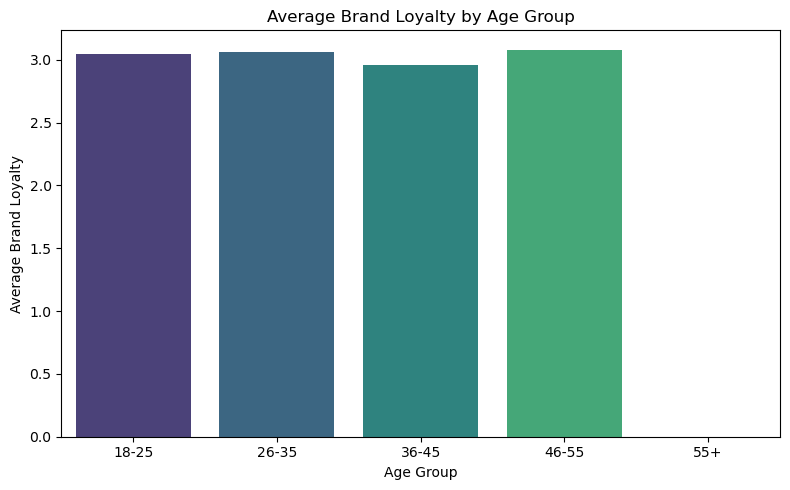

In [36]:
# Does being of any specific age group affects customers spend?

# Created age bins (cz range varied a lot)
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group by Age_Group and calculate average Brand Loyalty
age_loyalty = df.groupby('Age_Group')['Brand_Loyalty'].mean().sort_index()


plt.figure(figsize=(8,5))
sns.barplot(x=age_loyalty.index, y=age_loyalty.values, palette='viridis')
plt.title('Average Brand Loyalty by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Brand Loyalty')
plt.tight_layout()
plt.show()


In [ ]:
# The 36–45 group has the lowest loyalty
# 46–55 shows higher loyalty


In [ ]:
# Education - wise Purchase Behavior 

C:\Users\HP\AppData\Local\Temp\ipykernel_29244\4273823443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_loyalty.index, y=edu_loyalty.values, palette='mako')


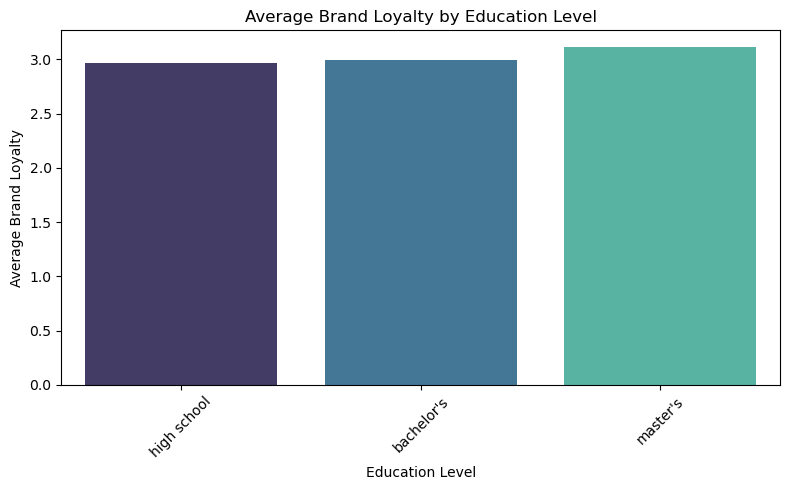

In [40]:
# Do people with different education levels spend differently?

# Grouped by Education Level and calculated average Brand Loyalty
edu_loyalty = df.groupby('Education_Level')['Brand_Loyalty'].mean().sort_values()


plt.figure(figsize=(8,5))
sns.barplot(x=edu_loyalty.index, y=edu_loyalty.values, palette='mako')
plt.title('Average Brand Loyalty by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Brand Loyalty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Master’s degree holders have the highest average brand loyalty
# High school graduates show the lowest brand loyalty


# Checking how Income Income level influence  frequency of purchase

C:\Users\HP\AppData\Local\Temp\ipykernel_20400\913199678.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_freq.index, y=occupation_freq.values, palette='Oranges')


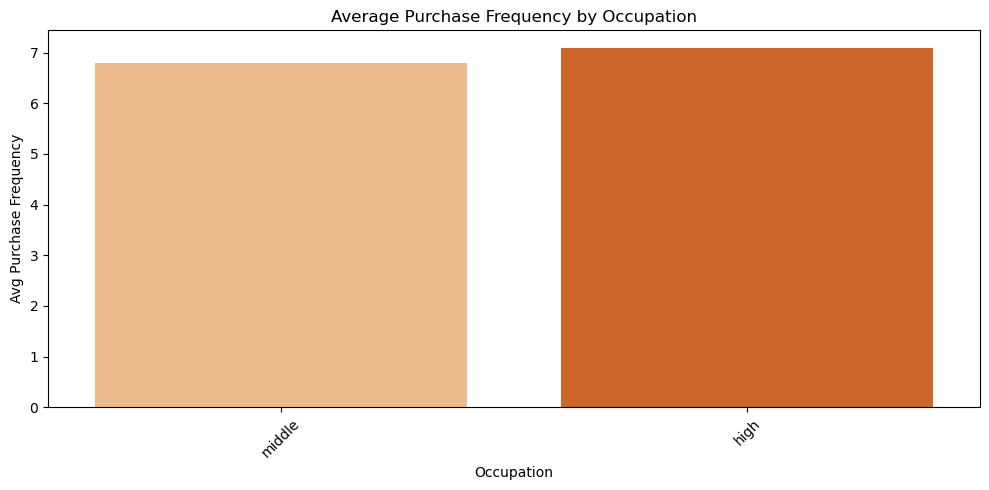

In [27]:
# Avg Purchase Frequency by Occupation

# Ensure Frequency_Of_Purchase is numeric
df['Frequency_Of_Purchase'] = pd.to_numeric(df['Frequency_Of_Purchase'], errors='coerce')

# Group by Occupation and calculate average Frequency of Purchase
occupation_freq = df.groupby('Occupation')['Frequency_Of_Purchase'].mean().sort_values()


plt.figure(figsize=(10,5))
sns.barplot(x=occupation_freq.index, y=occupation_freq.values, palette='Oranges')
plt.title('Average Purchase Frequency by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Avg Purchase Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Customers with a “high” occupation category  purchase slightly more frequently than those in the “middle” category.
# occupation level has a little influence on purchase frequency.


# KEY DRIVERS of Customers Satisfaction:

''' Checking various KEY DRIVERS for Customer Satisfaction:
     - Satisfaction by Income Level
     - Satisfaction by Device Used
     - Satisfaction by Purchase Channel              '''


C:\Users\HP\AppData\Local\Temp\ipykernel_29244\252246904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_satisfaction.index, y=income_satisfaction.values, palette='coolwarm')


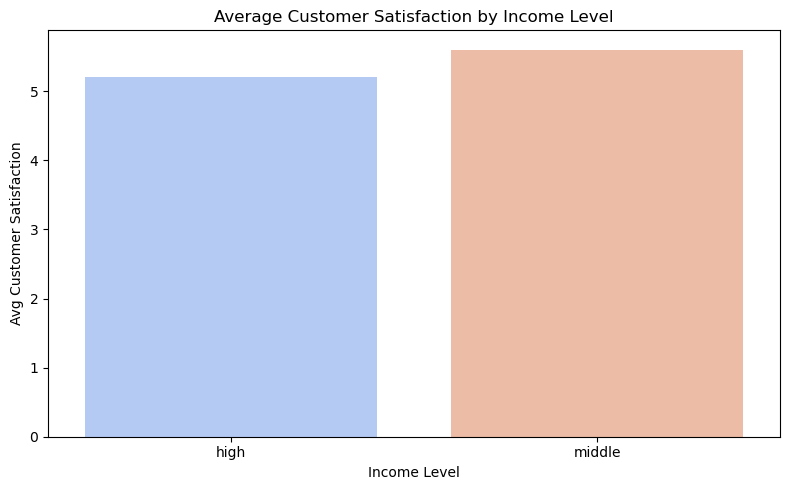

In [71]:

# Ensuring Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Group by Income Level and calculate average Customer Satisfaction
income_satisfaction = df.groupby('Income_Level')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=income_satisfaction.index, y=income_satisfaction.values, palette='coolwarm')
plt.title('Average Customer Satisfaction by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_29244\1538086627.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_satisfaction.index, y=device_satisfaction.values, palette='pastel')


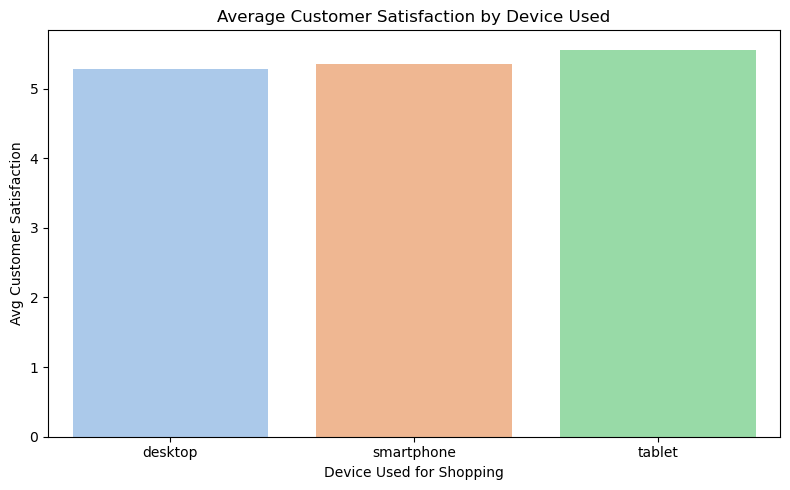

In [73]:

# Ensuring Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Group by Device Used and calculate average satisfaction
device_satisfaction = df.groupby('Device_Used_For_Shopping')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=device_satisfaction.index, y=device_satisfaction.values, palette='pastel')
plt.title('Average Customer Satisfaction by Device Used')
plt.xlabel('Device Used for Shopping')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_29244\115297976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_satisfaction.index, y=channel_satisfaction.values, palette='YlGnBu')


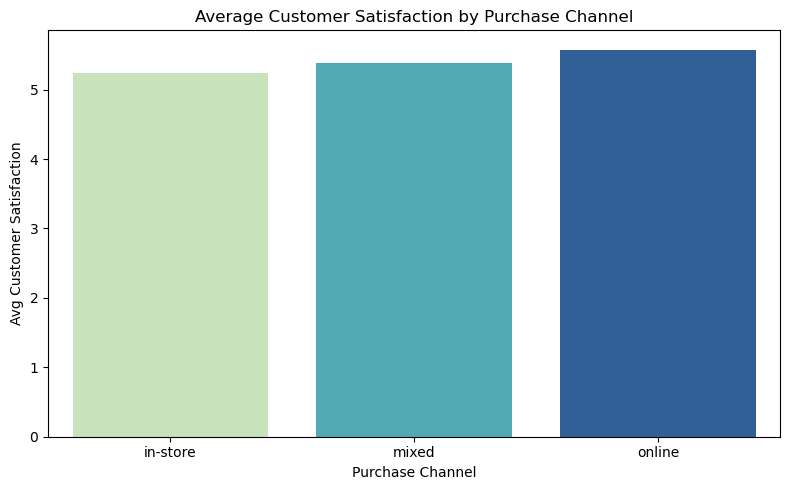

In [75]:

# Ensure Customer_Satisfaction is numeric
df['Customer_Satisfaction'] = pd.to_numeric(df['Customer_Satisfaction'], errors='coerce')

# Group by Purchase Channel and calculate average satisfaction
channel_satisfaction = df.groupby('Purchase_Channel')['Customer_Satisfaction'].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=channel_satisfaction.index, y=channel_satisfaction.values, palette='YlGnBu')
plt.title('Average Customer Satisfaction by Purchase Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Avg Customer Satisfaction')
plt.tight_layout()
plt.show()

# Identifying the product categories where discounts have the strongest impact on how much people spend

In [81]:
# Compare average purchase amount in each category 

#  with discount used
#vs. without discount

# Ensure data types are correct
df['Discount_Used'] = df['Discount_Used'].astype(bool)
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

# Group by Purchase Category and Discount Usage
category_discount_comparison = (
    df.groupby(['Purchase_Category', 'Discount_Used'])['Purchase_Amount']
    .mean()
    .unstack()
    .rename(columns={False: 'No Discount', True: 'With Discount'})
)


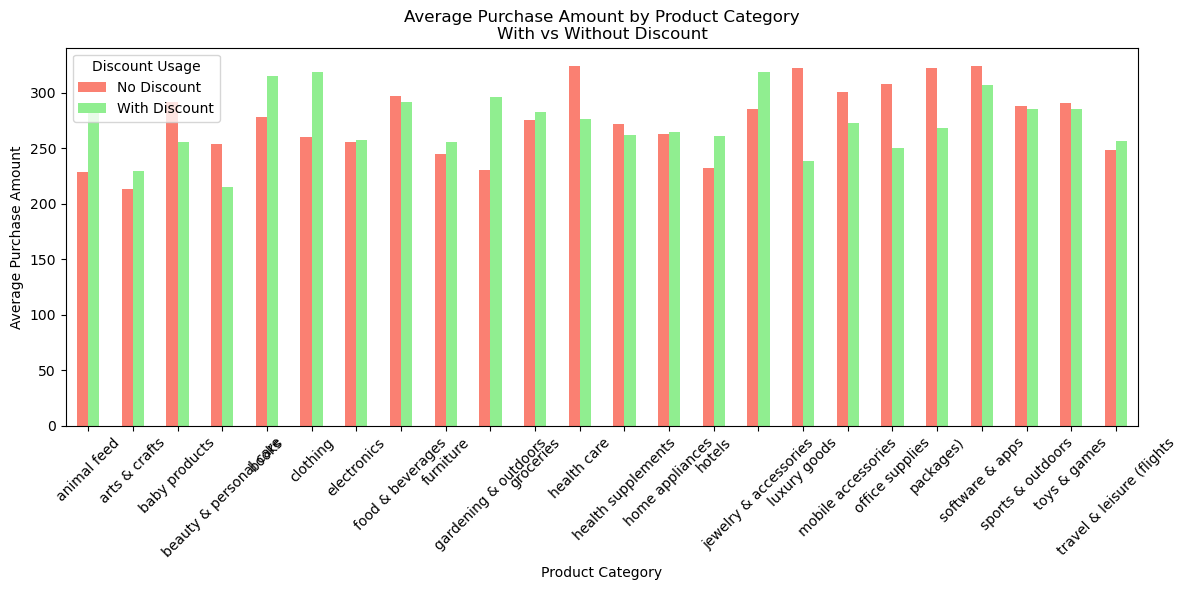

In [83]:
# Plot
category_discount_comparison.plot(kind='bar', figsize=(12,6), color=['salmon', 'lightgreen'])
plt.title('Average Purchase Amount by Product Category\nWith vs Without Discount')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Discount Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Checking when do Customers purchase the most?

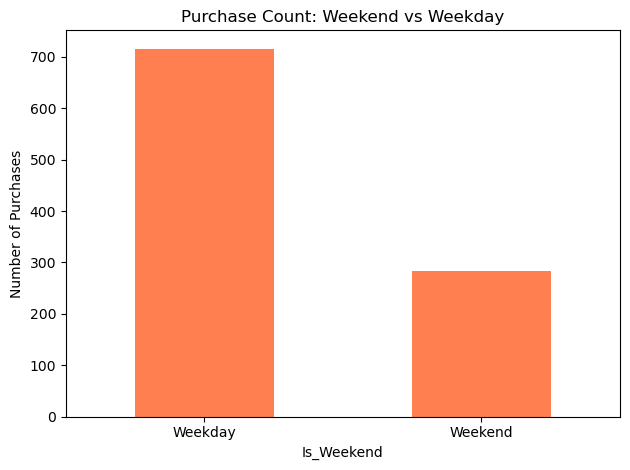

In [88]:
# Make sure Is_Weekend is boolean
df['Is_Weekend'] = df['Is_Weekend'].astype(bool)

# Plot purchase count
df['Is_Weekend'].value_counts().rename({True: 'Weekend', False: 'Weekday'}).plot(kind='bar', color='coral')
plt.title('Purchase Count: Weekend vs Weekday')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Checking which devices led to higher conversion rates

Average Frequency of Purchase by Device:
Device_Used_For_Shopping
desktop       7.105714
tablet        6.920354
smartphone    6.790997
Name: Frequency_Of_Purchase, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5988\1364659373.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Device_Used_For_Shopping', y='Frequency_Of_Purchase', estimator='mean', ci=None)


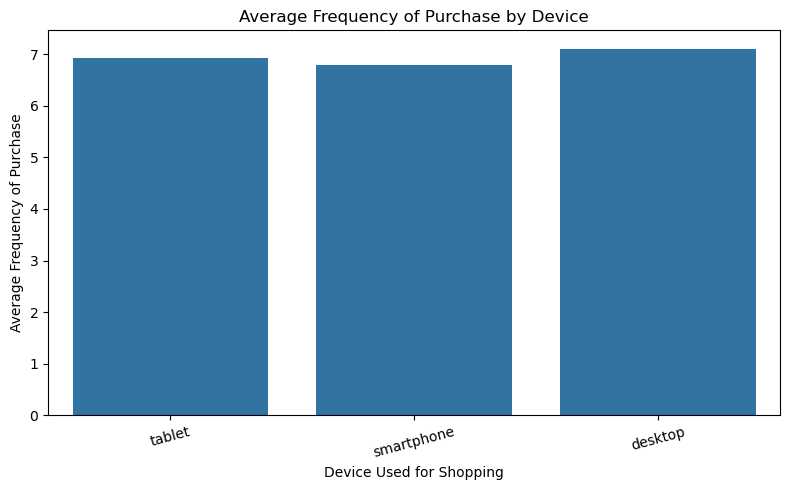

In [15]:

# Group by device and calculated average frequency
device_freq = df.groupby('Device_Used_For_Shopping')['Frequency_Of_Purchase'].mean().sort_values(ascending=False)

print("Average Frequency of Purchase by Device:")
print(device_freq)

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Device_Used_For_Shopping', y='Frequency_Of_Purchase', estimator='mean', ci=None)
plt.title("Average Frequency of Purchase by Device")
plt.xlabel("Device Used for Shopping")
plt.ylabel("Average Frequency of Purchase")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Average Purchase Amount by Device:
Device_Used_For_Shopping
smartphone    282.050129
tablet        277.291445
desktop       266.698543
Name: Purchase_Amount, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5988\3213699746.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Device_Used_For_Shopping', y='Purchase_Amount', estimator='mean', ci=None)


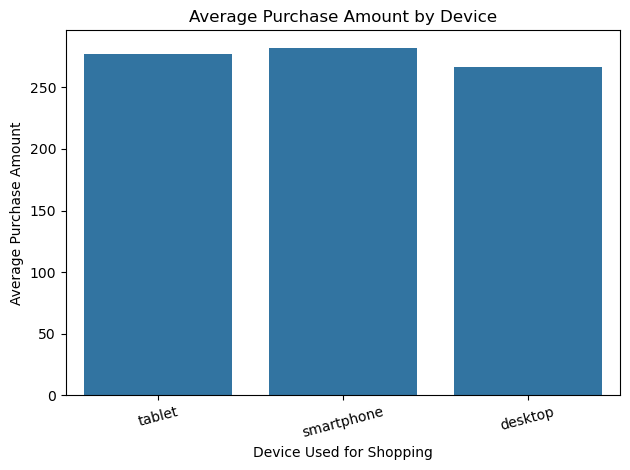

In [17]:

# Group and compare average purchase amount
purchase_amount_by_device = df.groupby('Device_Used_For_Shopping')['Purchase_Amount'].mean().sort_values(ascending=False)
print("Average Purchase Amount by Device:")
print(purchase_amount_by_device)

# Plot
sns.barplot(data=df, x='Device_Used_For_Shopping', y='Purchase_Amount', estimator='mean', ci=None)
plt.title("Average Purchase Amount by Device")
plt.xlabel("Device Used for Shopping")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Checking which payment methods led to higher conversion rates

Average Frequency of Purchase by Payment Method:
Payment_Method
credit card    7.180412
other          6.946078
paypal         6.922374
cash           6.860963
debit card     6.816327
Name: Frequency_Of_Purchase, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5988\1236327479.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Payment_Method', y='Frequency_Of_Purchase', estimator='mean', ci=None)


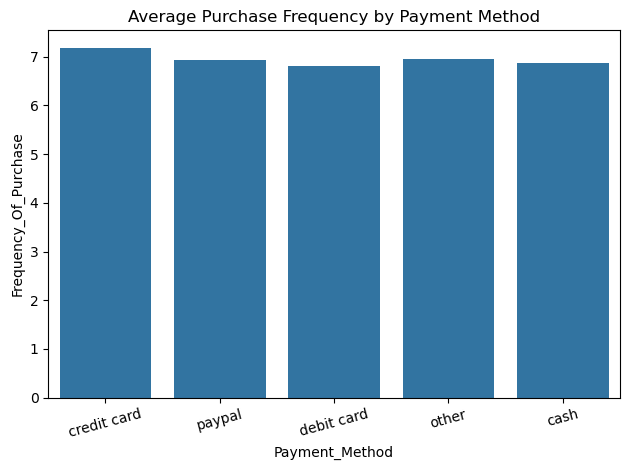

In [24]:
# Which Payment_Method leads to higher frequency of Purchase

freq_by_payment = df.groupby('Payment_Method')['Frequency_Of_Purchase'].mean().sort_values(ascending=False)
print("Average Frequency of Purchase by Payment Method:")
print(freq_by_payment)

sns.barplot(data=df, x='Payment_Method', y='Frequency_Of_Purchase', estimator='mean', ci=None)
plt.title("Average Purchase Frequency by Payment Method")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Average Purchase Amount by Payment Method:
Payment_Method
other          283.321078
paypal         278.375936
debit card     273.224694
credit card    271.533711
cash           267.767219
Name: Purchase_Amount, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5988\1155734163.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Payment_Method', y='Purchase_Amount', estimator='mean', ci=None)


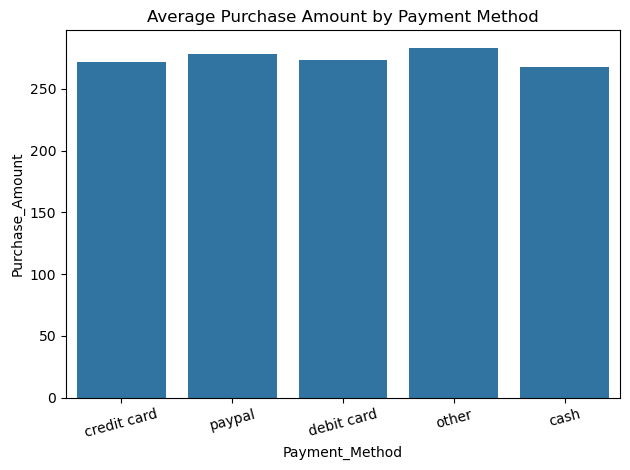

In [26]:
# Which Payment_Method leads to higher  Purchase amount

amount_by_payment = df.groupby('Payment_Method')['Purchase_Amount'].mean().sort_values(ascending=False)
print("Average Purchase Amount by Payment Method:")
print(amount_by_payment)

sns.barplot(data=df, x='Payment_Method', y='Purchase_Amount', estimator='mean', ci=None)
plt.title("Average Purchase Amount by Payment Method")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# Analyzing Time Spent on Product Research and customer satisfaction

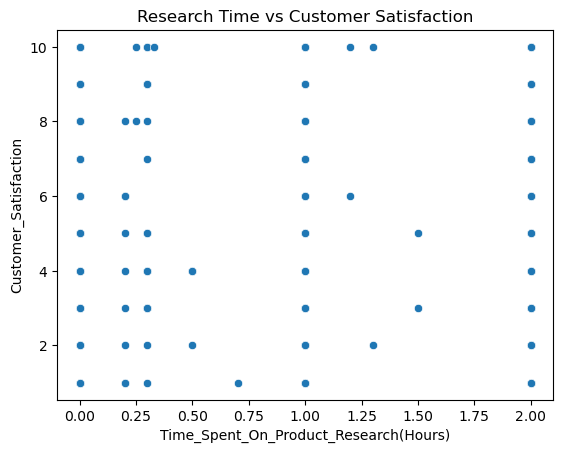

In [45]:

sns.scatterplot(data=df, x='Time_Spent_On_Product_Research(Hours)', y='Customer_Satisfaction')
plt.title('Research Time vs Customer Satisfaction')
plt.show()


# Aanalyzing Time Spent on Product Research and return rate

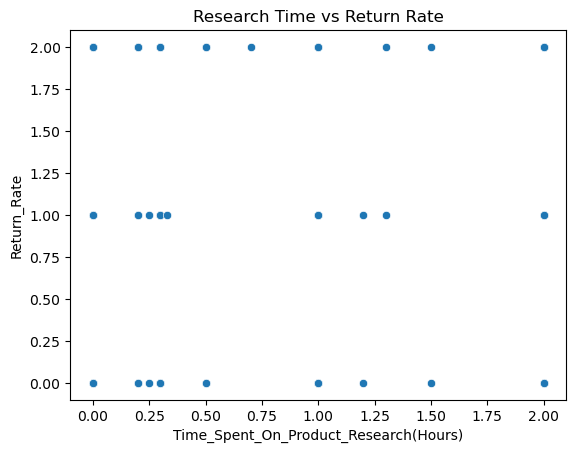

In [47]:

sns.scatterplot(data=df, x='Time_Spent_On_Product_Research(Hours)', y='Return_Rate')
plt.title('Research Time vs Return Rate')
plt.show()


# Correlation check

In [43]:

print("Correlation with Satisfaction:", df['Time_Spent_On_Product_Research(Hours)'].corr(df['Customer_Satisfaction']))
print("Correlation with Return Rate:", df['Time_Spent_On_Product_Research(Hours)'].corr(df['Return_Rate']))


Correlation with Satisfaction: 0.008175943106822575
Correlation with Return Rate: 0.015679282397321564


# Checking whether Social Media Influence changes across different demographics


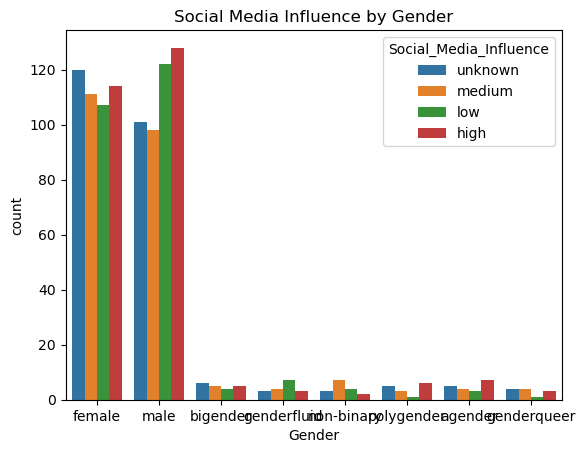

In [50]:
# Social_Media_Influence on gender

sns.countplot(data=df, x='Gender', hue='Social_Media_Influence')
plt.title("Social Media Influence by Gender")
plt.show()


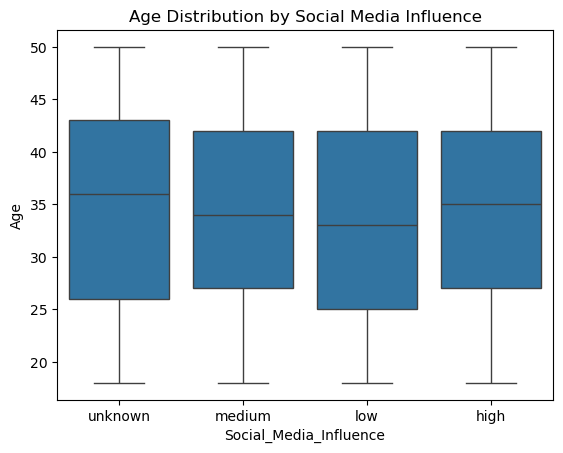

In [52]:
# Social_Media_Influence on age (using boxplot)

sns.boxplot(data=df, x='Social_Media_Influence', y='Age')
plt.title("Age Distribution by Social Media Influence")
plt.show()


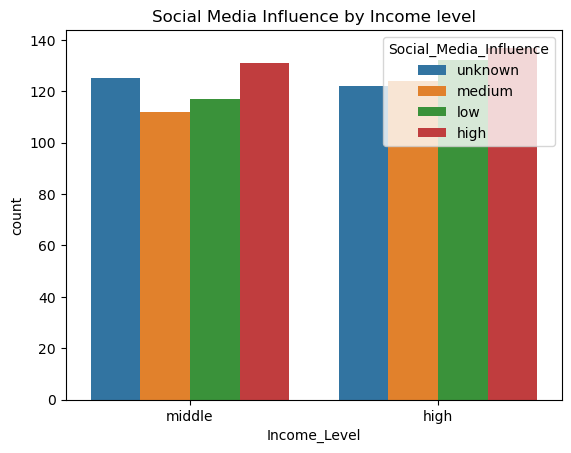

In [54]:
# Social_Media_Influence on Income_Level

sns.countplot(data=df, x='Income_Level', hue='Social_Media_Influence')
plt.title("Social Media Influence by Income level")
plt.show()

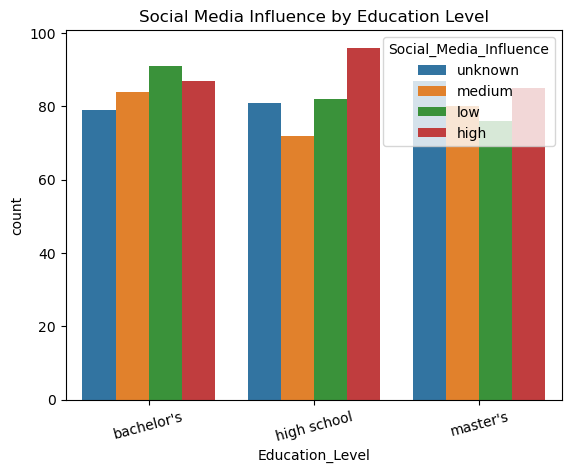

In [17]:
# Social_Media_Influence on Education_Level

sns.countplot(data=df, x='Education_Level', hue='Social_Media_Influence')
plt.title("Social Media Influence by Education Level")
plt.xticks(rotation=15)
plt.show()

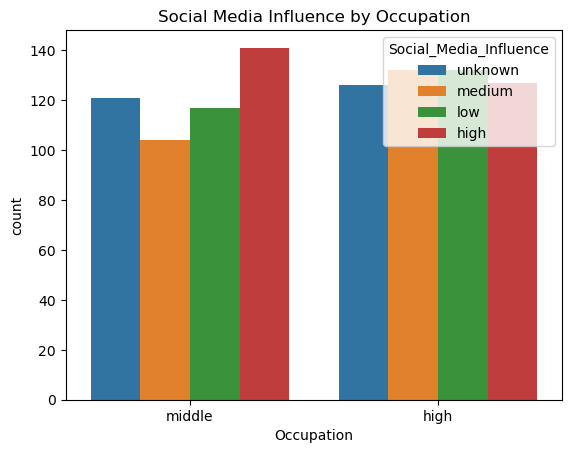

In [60]:
# Social_Media_Influence on Occupation

sns.countplot(data=df, x='Occupation', hue='Social_Media_Influence')
plt.title("Social Media Influence by Occupation")
plt.show()